# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is the first Project for Udacity Data Analyst Nanodegree. I choose the Medical Appointment No Shows dataset. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment . I'm analysing the dataset to find what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment.
The original dataset can be downloaded from Kaggle: here
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient is show-up or no-show to the appointment.
>
>```**Data Dictionary**
01 - PatientId -- Identification of a patient /n
02 - AppointmentID -- Identification of each appointment
03 - Gender -- Male or Female.(Female is the greater proportion)
04 - DataMarcacaoConsulta -- The day of the actuall appointment, when they have to visit the doctor.
05 - DataAgendamento -- The day someone called or registered the appointment, this is before appointment of course.
06 - Age -- How old is the patient.
07 - Neighbourhood -- Where the appointment takes place.
08 - Scholarship -- True of False .
09 - Hipertension -- True or False
10 - Diabetes -- True or False
11 - Alcoholism --True or False
12 - Handcap -- True or False
13 - SMS_received -- 1 or more messages sent to the patient.
14 - No-show -- True or False.
>
### Questions to Explore with the dataset
>
> ***Question 1***: What is the rate of show-up versus no shows?
                  How many patients for female and male?
                  Does gender affect the show-up rate?
                  
> ***Question 2***: What is the distribution of the Age and how does it affect show-up rate?

> ***Question 3***: How does enrollment in the Scholarship program contribute to no-shows?

> ***Question 4***: How did received SMS affect the appointmnet no_show?

> ***Question 5***: How did location contribute to the rate of no-shows?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
# inspect data types
# look for instances of missing or possibly errant data.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#checking for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

***There are no null values in the dataset***

In [9]:
#checking for duplicate data
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

***There are no duplicate values in the dataset***

> **Observations**: The dataset doesn't have null and duplicate values. Some spelling error was noticed in the header name, that will be changed subsequently. The data type of columns ScheduledDay and AppointmentDay will be changed from object to datetime.

### Data Cleaning

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns={'AppointmentID':'AppointmentId','Hipertension':'Hypertension', 'Handcap':'Handicap','No-show':'No_show'}, inplace=True)
df.head(5)

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# converting ScheduledDay column to a datetime datatype
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [12]:
# converting AppointmentDay column to a datetime datatype
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentId   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [13]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [14]:
df.describe()

,PatientId,AppointmentId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the rate of show-up versus no shows, How many patients are female or male, Does gender affect the show-up rate?)

Text(0, 0.5, 'Number of  no show')

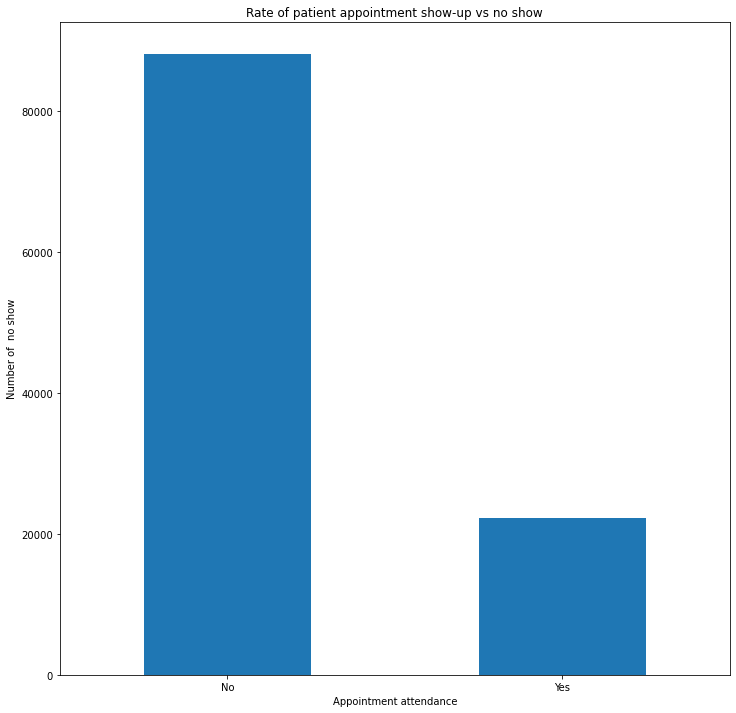

In [15]:
#Number of patients that show up vs no shows
df["No_show"].value_counts().plot(kind="bar", figsize=(12,12), rot=0);
plt.title("Rate of patient appointment show-up vs no show")
plt.xlabel("Appointment attendance")
plt.ylabel("Number of  no show")
# show-up = No, no show= Yes

***The patients who made it to their appointment are quite higher in number than those who didn't. More than four times the number.***

In [16]:
#a function declaration for plotting pie charts.
def pie_percent(df, show_stat):
  
    df[show_stat].value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
    plt.title(f"Percentage of patient appointment for {show_stat}".title(), weight='bold')
    plt.show()


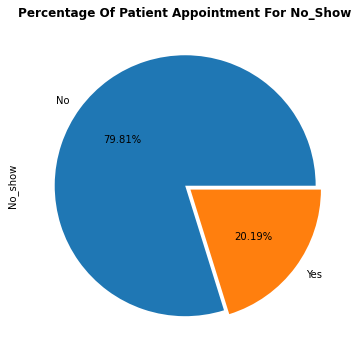

In [17]:
pie_percent(df, 'No_show')

**No** --- if the patient showed for their appointment,
**Yes** --- if they did not show up.

A great number of patients showed up for their appointments. The percentage is way higher than the no shows.

In [18]:
# number gender patients
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

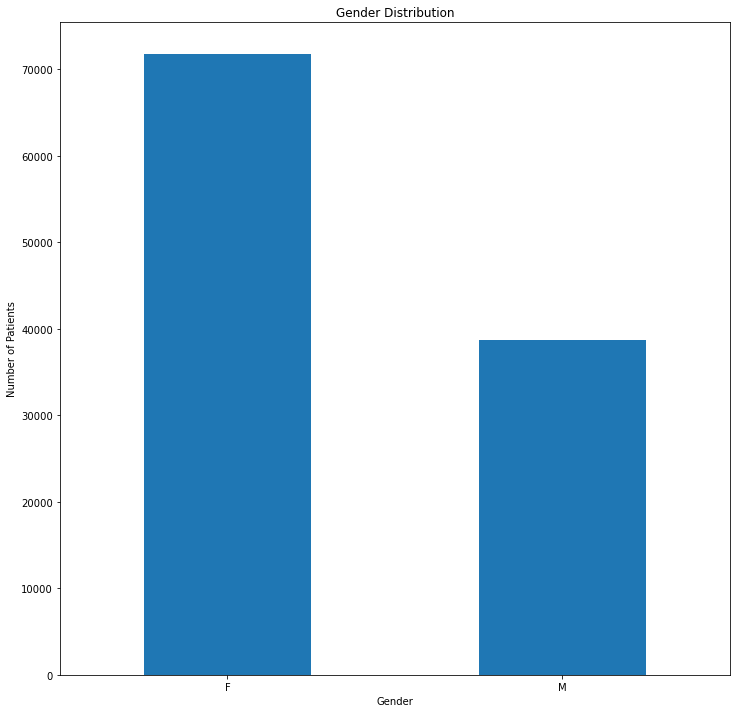

In [19]:
df["Gender"].value_counts().plot(kind="bar", figsize=(12,12), rot=0);
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

***There are 71839 female patients  and 38687 male patients.
Number of female patients are greater than male patient.***

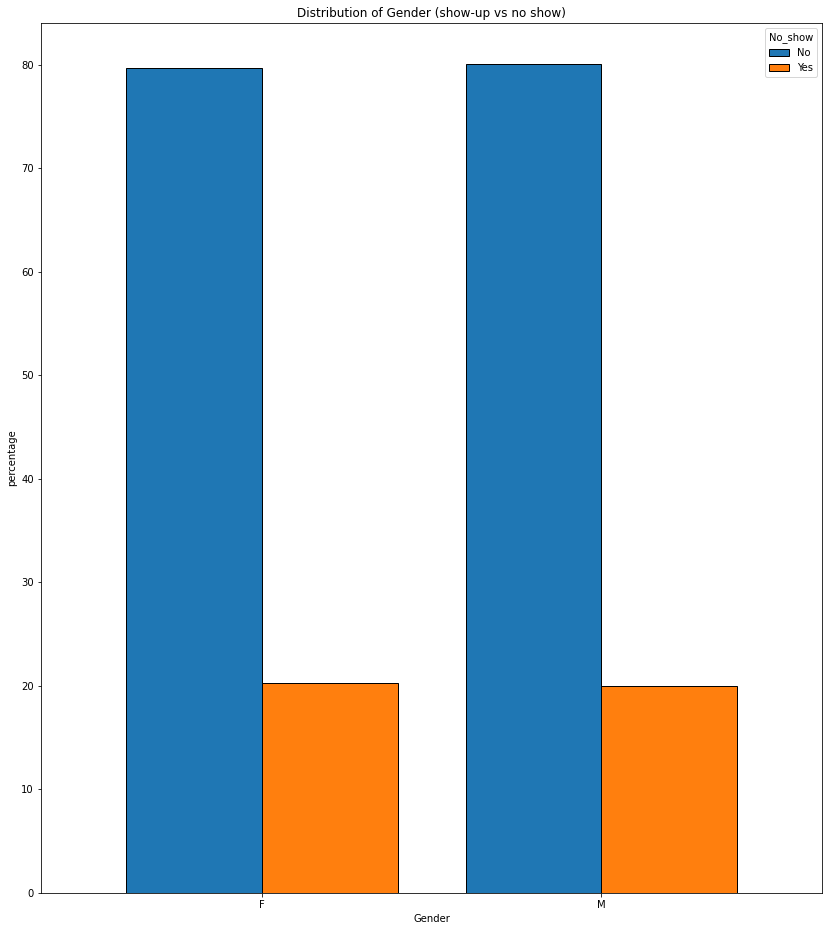

In [20]:
#df.groupby('Gender').No_show.value_counts().plot(kind="bar", figsize=(12,12));
#plt.figure(figsize=(12,12))
#sns.countplot(data = df, x = 'Gender',  hue = df.No_show);

df.groupby('Gender')['No_show'].value_counts(normalize=True).unstack('No_show').mul(100).plot.bar(
    edgecolor='black', figsize=[14,16], rot=0, width=0.8);
plt.title('Distribution of Gender (show-up vs no show)')
plt.ylabel("percentage")
plt.show;
#Ps: No means show-up Yes means No-show.

The percentage of a female and male show up and no show are almost the same.

### Research Question 2  (What is the distribution of the Age and how does it affect show-up rate?)

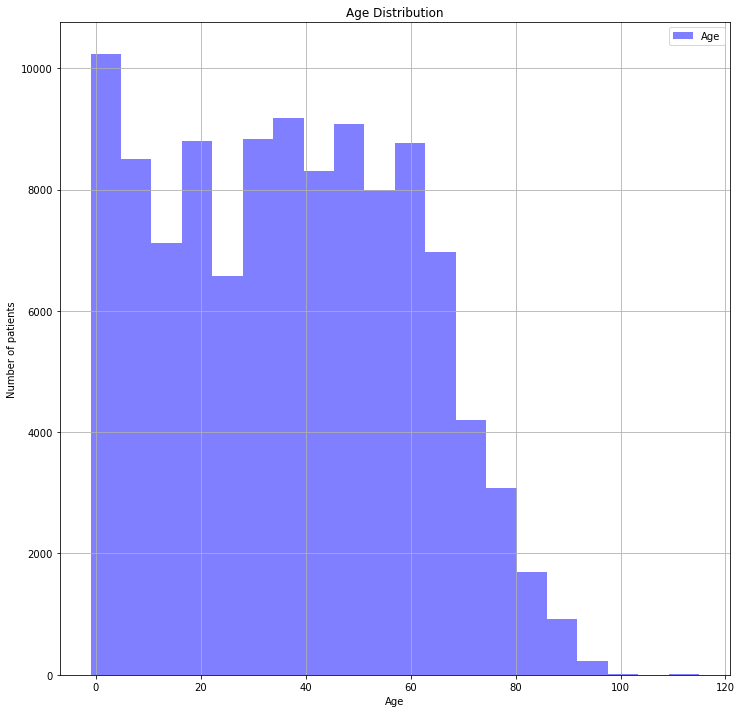

In [21]:
df.Age.hist(alpha=0.5, bins=20, label='Age', color='blue', figsize=(12,12))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel('Number of patients')
plt.legend();

***We can infer from the histogram plot that the greater percentage of the patients are young.***
The age column of the dataset has a bimodal distribution, with peaks around 0 and 60 years old.

In [22]:
print('Mean age: {:.2f}'.format(df.Age.mean()))

Mean age: 37.09


In [23]:
#To seperate show up and no_shows
showup = (df.No_show == 'No')
noshow = (df.No_show == 'Yes')

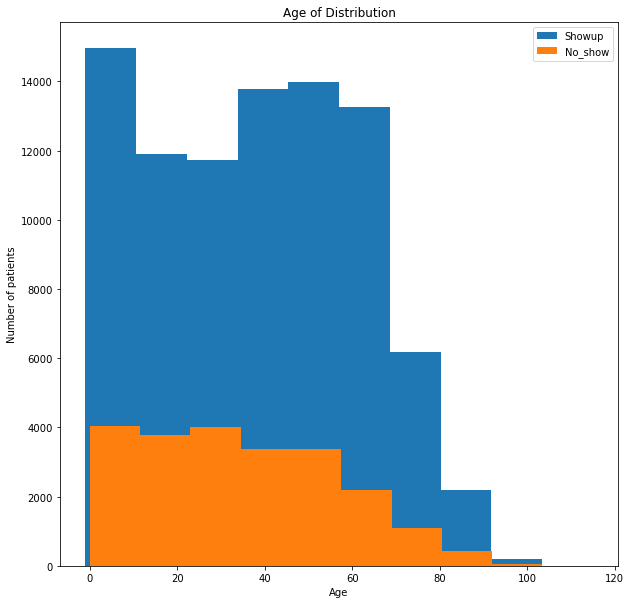

In [24]:
df[showup].Age.plot.hist(figsize=(10,10))
df[noshow].Age.plot.hist(figsize=(10,10))
plt.title('Age of Distribution')
plt.legend(['Showup', 'No_show'])
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.show()

The early years age group had the highest show up rate, followed by middle age people. 
Young adults and older age groups didn't show up as much. The no show data also reflects almost the same pattern. 

### Research Question 3  (How does Scholarship contribute to no-shows?)

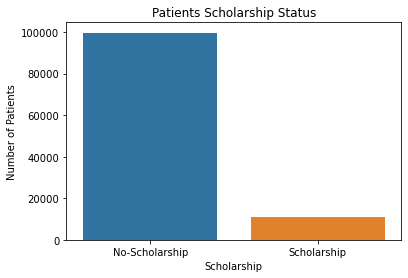

In [25]:
sns.countplot(data = df, x = 'Scholarship')
plt.title('Patients Scholarship Status')
plt.xticks([0, 1], ['No-Scholarship', 'Scholarship'])
plt.xlabel('Scholarship')
plt.ylabel('Number of Patients');

Only few patients are enrolled in the Medical Welfare program

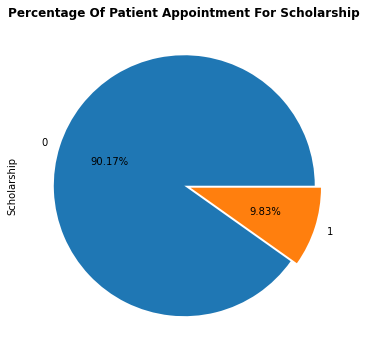

In [26]:
#df['Scholarship'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f%%', explode=(0, .05), labels=['No', 'Yes'])
#plt.title("Percentage of Patient with Scholarship vs No Scholarship")

#Plotting another pie chart using the function declared earlier.
pie_percent(df, 'Scholarship')

0- No Scholarship.
1- Has Scholarship.
We can infer from this chart that only 9.38% patients are on the medical welfare program

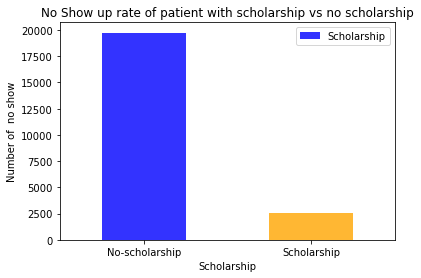

In [27]:
#patient that didn't showup for the appointment 
df.Scholarship[noshow].value_counts().plot(kind='bar',alpha=0.8, color=['Blue','Orange'], rot=0)
plt.title("No Show up rate of patient with scholarship vs no scholarship")
plt.xlabel("Scholarship")
plt.ylabel("Number of  no show")
plt.xticks([0, 1],['No-scholarship','Scholarship'])
plt.legend();

Some of the patients who had Scholarship  didn't show up despite the scholarship. Some Patients who didn't have scholarship didn't show as well.

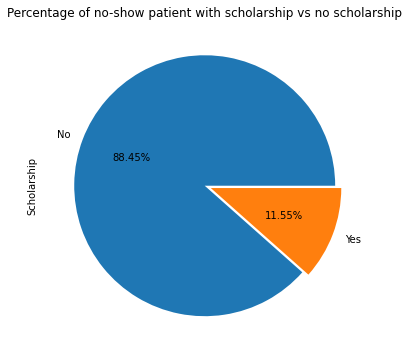

In [32]:
df.Scholarship[noshow].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f%%', explode=(0, .05), labels=['No', 'Yes']);
plt.title("Percentage of no-show patient with scholarship vs no scholarship");

88.45% of the Patients that didn't show up had no scholarship while 11.55% had Scholarship.
This might seem like a huge disparity, however there's a large disparity between those that 
had scholarship and those that didn't have.

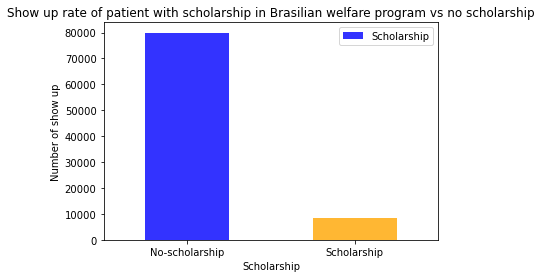

In [33]:
#the patient that showed up the appointment 
df.Scholarship[showup].value_counts().plot(kind='bar', alpha=0.8, color=['Blue','Orange'], rot=0)
plt.title("Show up rate of patient with scholarship in Brasilian welfare program vs no scholarship")
plt.xlabel("Scholarship")

plt.ylabel("Number of show up")
plt.xticks([0, 1],['No-scholarship','Scholarship'])
plt.legend();

***The 90.17% of the patients are not on the scholarship program and only 9.83% are. This shows that most of the Patients did not have scholarship. 11.55% no show rate is still high for those who have scholarship.***

### Research Question 4 (How did received SMS affect the appointment no_show?)

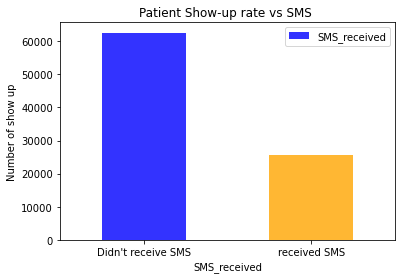

In [34]:
#patients did not attend the appointment but received SMS 
df.SMS_received[showup].value_counts().plot(kind='bar', alpha=0.8, color=['blue','orange'], rot=0)
plt.title("Patient Show-up rate vs SMS ")
plt.xlabel("SMS_received")
plt.ylabel("Number of show up")
plt.xticks([0, 1],["Didn't receive SMS","received SMS"])
plt.legend();

***Patients who didn't receive SMS showed up more than those who did.***

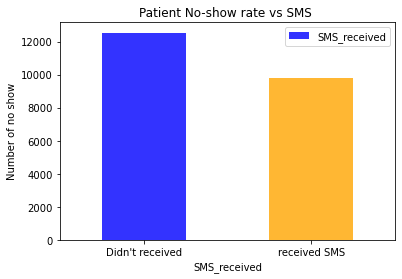

In [35]:
#patients did not attend the appointment but received SMS 
df.SMS_received[noshow].value_counts().plot(kind='bar', alpha=0.8, color=['blue','orange'], rot=0)
plt.title("Patient No-show rate vs SMS ")
plt.xlabel("SMS_received")
plt.ylabel("Number of no show")
plt.xticks([0, 1],["Didn't received","received SMS"])
plt.legend();

***The number of patients who received and didn't receive sms in the no show category.***
***This shows that patients still missed their appointments despite the SMS notification received.***

### Research Question 5  (How did Hospital location contribute to the rate of no-shows?)

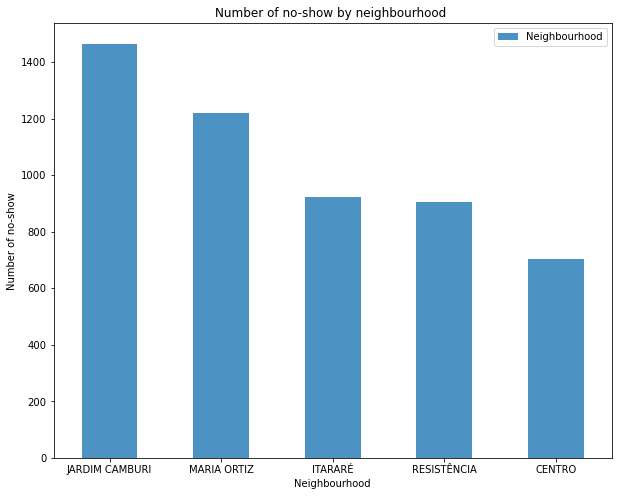

In [36]:
n_hood=df.Neighbourhood[noshow].value_counts().head(5)
n_hood.plot(kind='bar', alpha=0.8, figsize=(10,8), rot=0)
plt.title("Number of no-show by neighbourhood ")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of no-show")
plt.legend();

The Hospital(Neighbourhood) that had the highest rate of no show Patients.

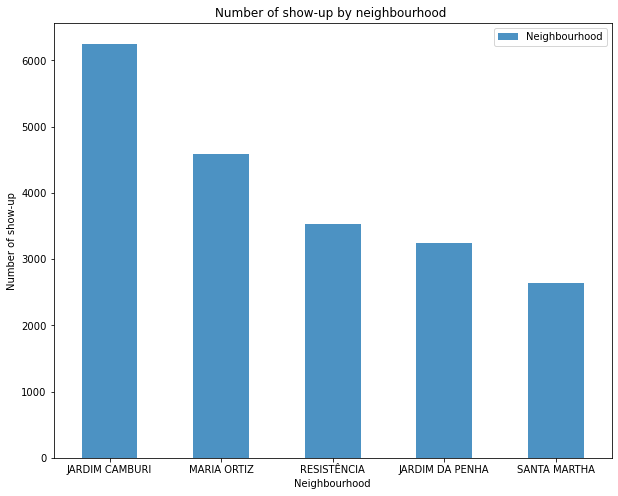

In [37]:
n_hood=df.Neighbourhood[showup].value_counts().head(5)
n_hood.plot(kind='bar', alpha=0.8, figsize=(10,8), rot=0)
plt.title("Number of show-up by neighbourhood ")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of show-up")
plt.legend();

***This shows that some of the hospitals that have the highest show up rate also have a high no show rate.***

## <a id='conclusions'></a>
## Conclusions

***What is the rate of show-up versus no shows?
     How many patients for female and male?
     Does gender affect the show-up rate?***
     The proportion of patients show-up appointment is 79.8% and no show appointment is 20.2% 
     Total attended appointments is far greater than the number of appointments that patients did not show-up for.
     From the gender graph, it can be seen that there are 71839 female patients and 38687 male patients.
     We can infer that the number of females are greater than of males patients
 
                  
***What is the distribution of the Age and how does it affect show-up rate?***
       We can infer from the analysis that the greater percentage of the patients are young.
       The age column of the dataset has a bimodal distribution, with peaks around 0 and 60 years old.
       The young demographic attended more appointments than the older age.
       Middle aged people and baby/toddlers have a higher number of no-show appointments.
        

***How does the Scholarship program contribute to no-shows?***
        The 90.17% of the patients are not on the scholarship program and only 9.83% are. This shows that most of the
        Patients didnt have scholarship. 11.55% no show rate is still high for those who have scholarship. People who have
        Scholarship are likely to miss their appointments as people who dont.

***How did received SMS affect the appointmnet no_show?***
         Receiving SMS aren't really effective as it didn't improve show-up rate, i.e the number of no show
         patients who received SMS is very high.

***How did location contribute to the rate of no-shows?***
        The hospitals location that had high atendance rate and also had a high number of no_shows. There is no value in
        the dataset that can explain what contributed to this.

***From the analysis, we can infer that Female patients are more conscious of their health or have more urgent health care need than male patients. While Men neglected their health the most by skipping their appointment dates with the Hospital. Age also seemed like a contributing factor to missed appointments because some age groups attended more than others. 
We can infer that gender is the most important factor of this anaylsis.***



<a id='limitations'></a>
## Limitations

>***It looks like there is no one simple combination of characteristics which might help us realise why patients might likely not show up for an appointment.***

>The dataset covering a longer time frame/period could have led to  better results.

>The age column had values 0 and less.

>Other factors or features that can help understand and analyse the dataset could have been included, 
features such as financial status, employment status, weather conditions on the appointment date, and severity of 
medical issues amongst others.

***Resources***
https://www.kaggle.com/datasets/joniarroba/noshowappointments

https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/

https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

https://stackoverflow.com/